# ***Assignment-07-K-Means Clustering (Airlines)***

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained. 

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

In [14]:
# load the datset
data = pd.read_csv("/content/EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [16]:
# drop the column
data2=data.drop(['ID#'],axis=1)
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# ***EXPLORATORY DATA ANALYTICS***

In [35]:
# display all columns
data2.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [17]:
# CHECKING DATA TYPES
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [18]:
# checking a null values 
data2.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

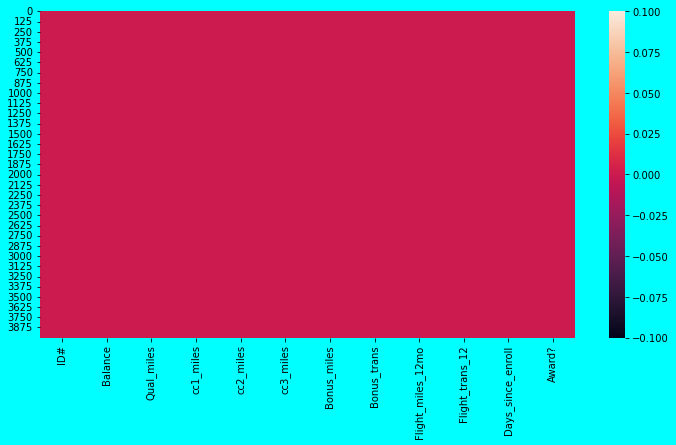

In [19]:
# visualizing missing values
plt.subplots(figsize=(12,6), facecolor = "cyan")
sns.heatmap(data.isnull())

In [21]:
# print the duplicated rows
data2.duplicated().sum()

1

In [23]:
data2[data2.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


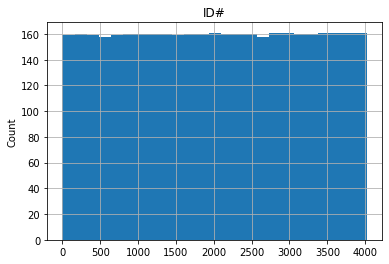

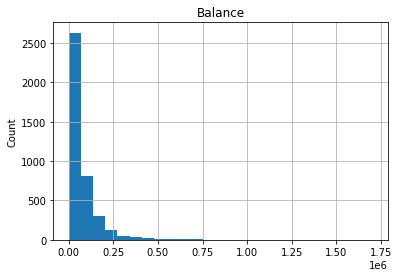

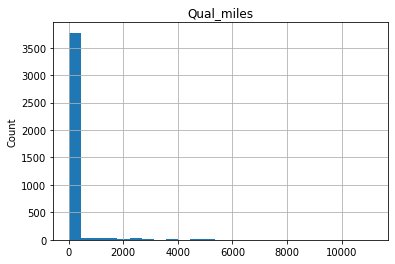

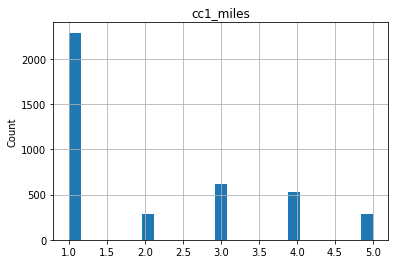

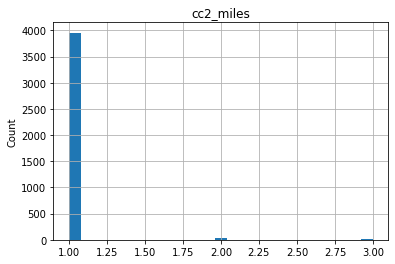

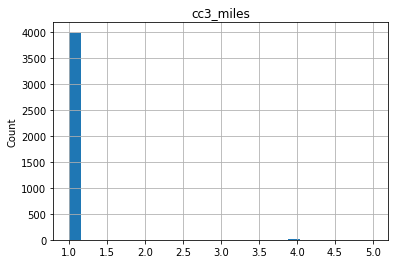

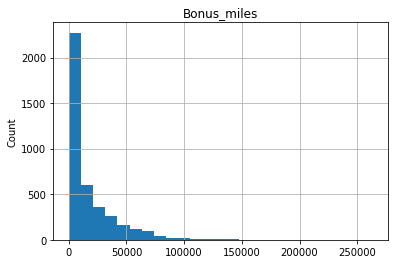

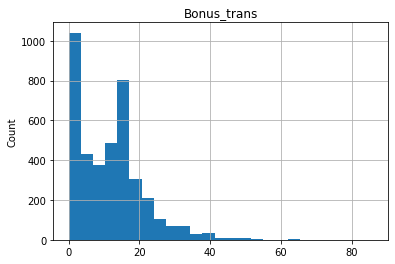

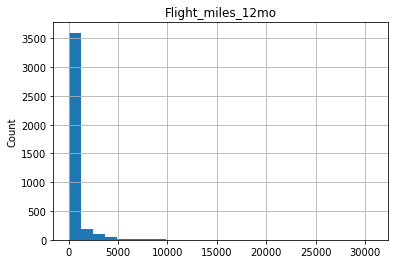

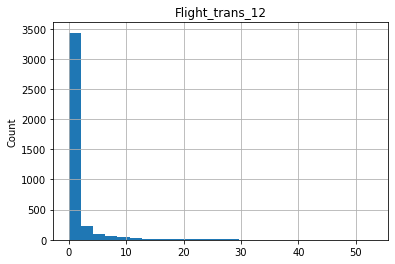

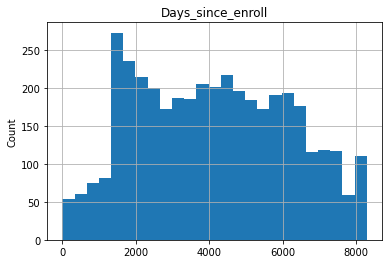

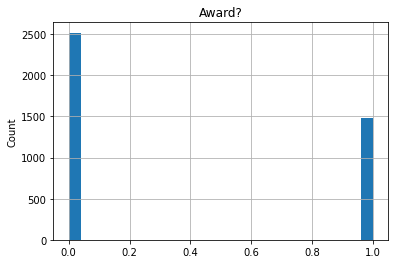

In [26]:
for feature in data.columns:
    data=data2.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

ID#


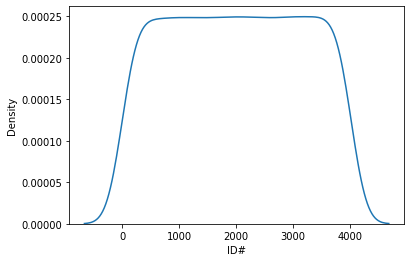

Balance


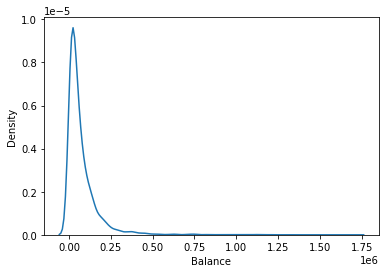

Qual_miles


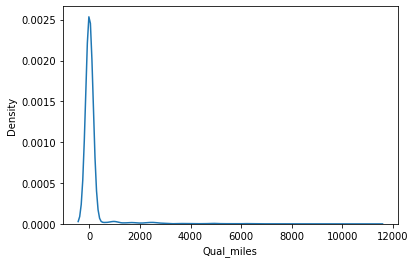

cc1_miles


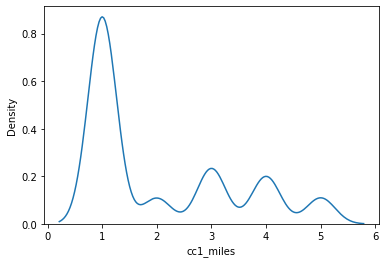

cc2_miles


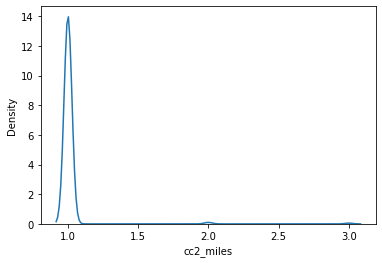

cc3_miles


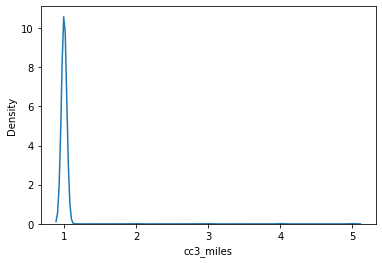

Bonus_miles


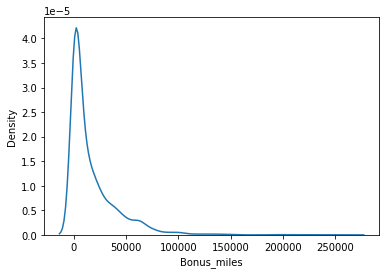

Bonus_trans


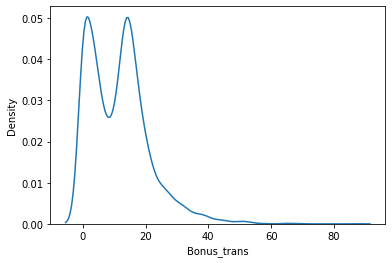

Flight_miles_12mo


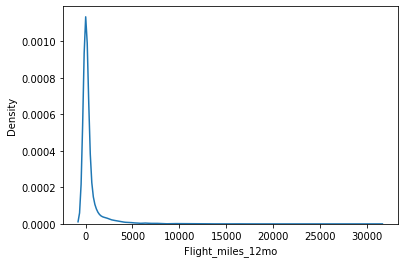

Flight_trans_12


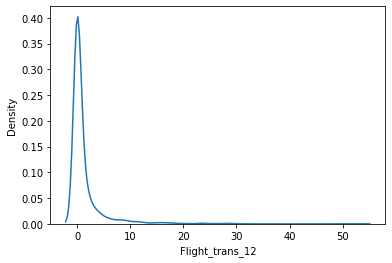

Days_since_enroll


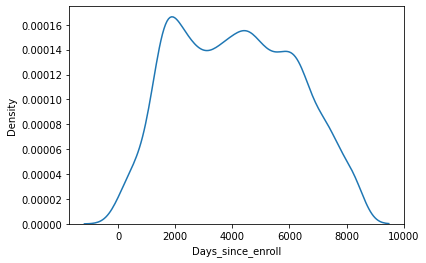

Award?


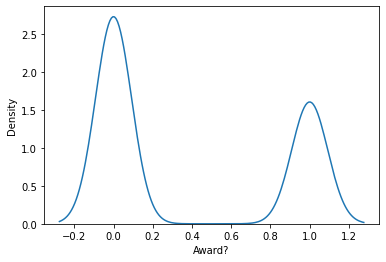

In [25]:
# Kernel Density for every feature, singled out

for n in data2.columns:
    print(n)
    sns.kdeplot(data2[n])
    plt.show()

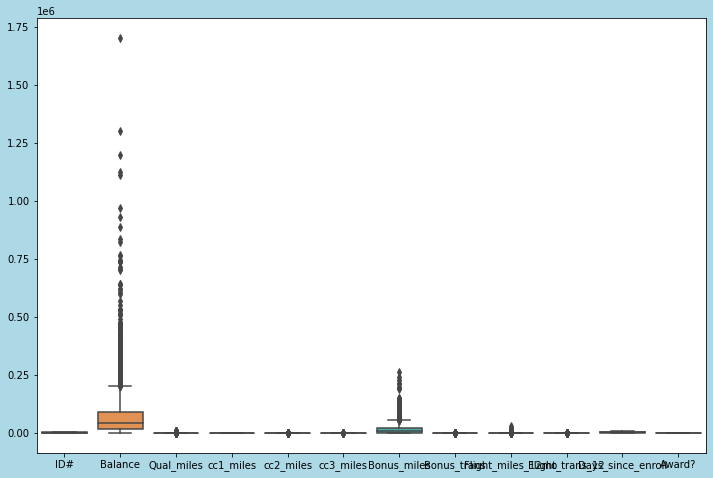

In [28]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8), facecolor="lightblue")
sns.boxplot(data=data2)

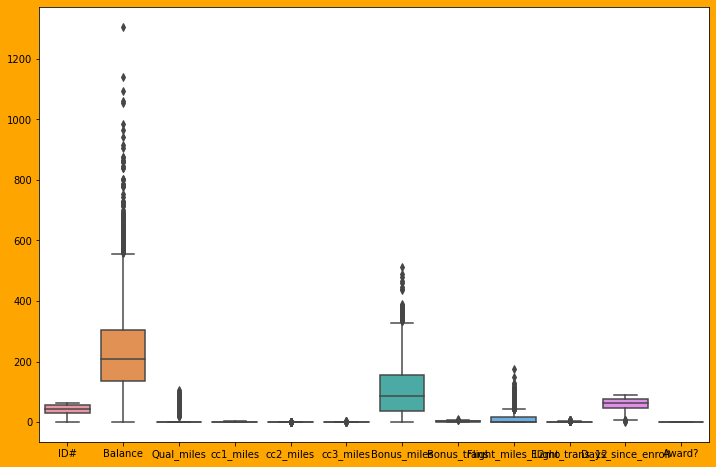

In [31]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8), facecolor="orange")
sns.boxplot(data=np.sqrt(data2))

In [32]:
# CORRELATION ANALYSIS
data2.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


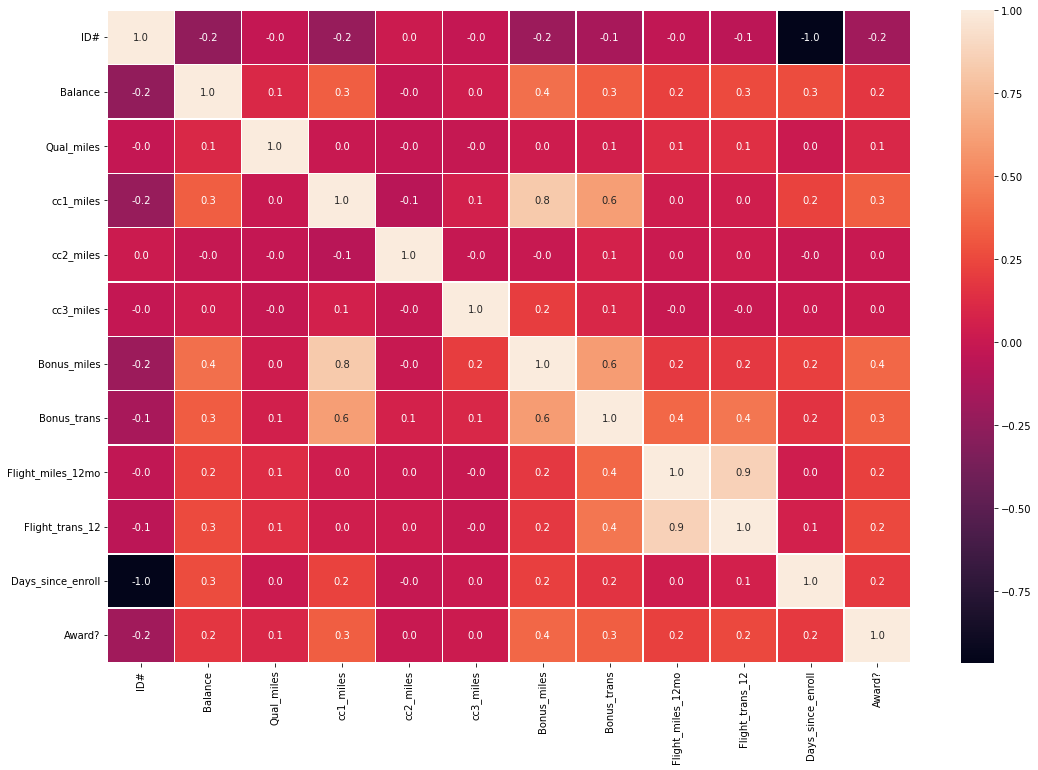

In [34]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data2.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [35]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline=scaler.fit_transform(data2)
scaled_airline

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [36]:
#Ploting elbow graph to see the ideal k value  
wcss = []
for i in range(1,11):
 kmeans=KMeans(n_clusters=i,random_state=0)
 kmeans.fit(scaled_airline)
 wcss.append(kmeans.inertia_)


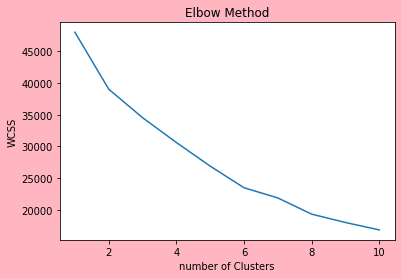

In [37]:
#  Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.subplots(facecolor ="lightpink")
plt.plot(range(1,11),wcss,)
plt.title("Elbow Method")
plt.xlabel("number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [38]:
# BUILD CLUSTER ALGORITHM
from sklearn.cluster import KMeans
clusters_4=KMeans(4,random_state=40)
clusters_4.fit(scaled_airline)
clusters_4

KMeans(n_clusters=4, random_state=40)

In [39]:
clusters_4.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [40]:
#assign cluster column to the data set 
data3=data2.copy()
data3['cluster_new']=clusters_4.labels_
data3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [41]:
clusters_4.cluster_centers_

array([[-0.79159289, -0.16435061, -0.04825387, -0.50585756,  0.02680935,
        -0.05882618, -0.46590113, -0.37645782, -0.16543415, -0.17638578,
         0.77091404, -0.23965222],
       [-0.21937913,  1.19293893,  0.85463972,  0.1048172 ,  0.16062214,
        -0.06276658,  0.63532192,  1.6738428 ,  3.59883523,  3.90180833,
         0.26628629,  0.93459683],
       [ 0.96477511, -0.33302824, -0.05337351, -0.48091901,  0.01574764,
        -0.06276658, -0.44560585, -0.38567835, -0.18294754, -0.20243324,
        -0.95144756, -0.32058346],
       [-0.42834932,  0.54252058,  0.01104681,  1.38834343, -0.08465391,
         0.18385431,  1.19798091,  0.82494974, -0.06750129, -0.07073525,
         0.42727309,  0.66210394]])

In [42]:
#Group by the cluster 
data3.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1096.081538,57040.856923,106.786923,1.363077,1.018462,1.000769,5894.290000,7.986923,228.442308,0.704615,5710.401538,0.254615
1,1,1760.203822,193805.509554,805.235669,2.203822,1.038217,1.000000,32486.566879,27.675159,5498.547771,16.171975,4668.407643,0.821656
2,2,3134.555987,40044.381230,102.826537,1.397411,1.016828,1.000000,6384.379288,7.898382,203.922977,0.605825,2153.937864,0.215534
3,3,1517.669007,128267.363089,152.659980,3.970913,1.002006,1.048144,46073.626881,19.523571,365.551655,1.105316,5000.825476,0.690070


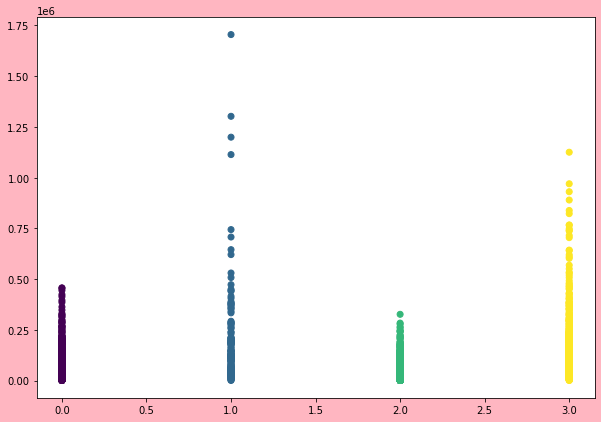

In [43]:
# Plot Clusters
plt.figure(figsize=(10, 7), facecolor="lightpink")  
plt.scatter(data3['cluster_new'],data3['Balance'], c=clusters_4.labels_) 

In [44]:
#Again calculating same for k=5
from sklearn.cluster import KMeans
clusters_5=KMeans(5,random_state=24)
clusters_5.fit(scaled_airline)
clusters_5

KMeans(n_clusters=5, random_state=24)

In [45]:
clusters_5.labels_

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [46]:
#assign cluster column to the data set 
data4=data2.copy()
data4['cluster_new1']=clusters_5.labels_
data4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_new1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [47]:
# Compute the centroids for K=4 clusters with 11 variables
clusters_5.cluster_centers_

array([[ 0.96882707, -0.33948606, -0.06142401, -0.5047083 ,  0.0183126 ,
        -0.06276658, -0.45836349, -0.40700604, -0.18795574, -0.20686579,
        -0.95758504, -0.35439642],
       [-0.39314545,  0.51426364,  0.02612199,  1.35849904, -0.08503797,
        -0.05278116,  1.12202887,  0.79894727, -0.06489066, -0.07126314,
         0.39581406,  0.68831833],
       [-0.22708278,  1.20284695,  0.8613124 ,  0.10111012,  0.16228153,
        -0.06276658,  0.63485991,  1.68030149,  3.607528  ,  3.91562026,
         0.27255539,  0.93222938],
       [-0.30152248,  0.63971926, -0.08443292,  1.0220844 , -0.09824189,
        15.64629931,  3.17969131,  1.71461374,  0.03329269,  0.05969539,
         0.23987261,  0.33752735],
       [-0.79053658, -0.16414483, -0.05196571, -0.51302108,  0.02768113,
        -0.05879871, -0.46889845, -0.3815492 , -0.16475199, -0.17509063,
         0.7704795 , -0.24880892]])

In [48]:
# Group by the cluster 
data4.groupby('cluster_new1').agg(['mean']).reset_index()

,cluster_new1,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3139.258769,39393.672402,96.598941,1.364659,1.017207,1.000000,6076.308405,7.693580,196.911317,0.589014,2141.264725,0.199206
1,1,1558.527290,125420.107212,164.321637,3.929825,1.001949,1.001949,44239.540936,19.273879,369.206628,1.103314,4935.866472,0.702729
2,2,1751.262821,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,1097.307514,57061.591789,103.915569,1.353215,1.018590,1.000775,5821.910922,7.938033,229.397366,0.709527,5709.504260,0.250194


In [49]:
data4[data4['cluster_new1']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_new1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,4
2194,2211,81251,0,1,1,1,19500,6,0,0,3958,1,4
2200,2217,12271,500,2,1,1,7684,15,1000,2,4219,0,4
2202,2219,35445,0,1,1,1,3379,9,0,0,4198,1,4


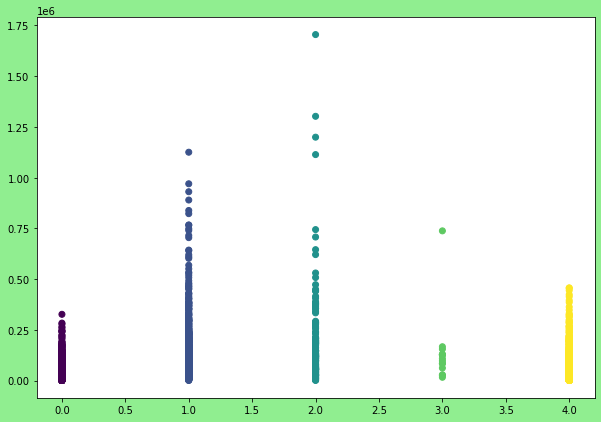

In [50]:
# Plot Clusters
plt.figure(figsize=(10, 7),facecolor = "lightgreen")  
plt.scatter(data4['cluster_new1'],data4['Balance'], c=clusters_5.labels_) 